# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path_to_data = "/content/drive/MyDrive/Classroom/Week11_Countries Population from 1995 to 2020.csv"
df = pd.read_csv(path_to_data)

In [ ]:
df.head()

In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            4195 non-null   int64  
 1   Country                         4195 non-null   object 
 2   Population                      4195 non-null   int64  
 3   Yearly % Change                 4195 non-null   float64
 4   Yearly Change                   4195 non-null   int64  
 5   Migrants (net)                  3600 non-null   float64
 6   Median Age                      3600 non-null   float64
 7   Fertility Rate                  3600 non-null   float64
 8   Density (P/Km²)                 4195 non-null   object 
 9   Urban Pop %                     4082 non-null   float64
 10  Urban Population                4082 non-null   float64
 11  Country's Share of World Pop %  4195 non-null   float64
 12  World Population                41

Index(['Year', 'Country', 'Population', 'Yearly % Change', 'Yearly Change',
       'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)',
       'Urban Pop %', 'Urban Population', 'Country's Share of World Pop %',
       'World Population', 'Country Global Rank'],
      dtype='object')

In [ ]:
print(df.shape)
df.dtypes

(4195, 14)


Year                                int64
Country                            object
Population                          int64
Yearly % Change                   float64
Yearly Change                       int64
Migrants (net)                    float64
Median Age                        float64
Fertility Rate                    float64
Density (P/Km²)                    object
Urban Pop %                       float64
Urban Population                  float64
Country's Share of World Pop %    float64
World Population                    int64
Country Global Rank                 int64
dtype: object

## Comparison (in time)
1. The population of top 10 most populated countries in 2020
2. The population density of top 10 most densely populated countries in 2020

In [ ]:
# 2020 population data
current_population = df[df['Year'] == 2020][:10]
current_population['Density (P/Km²)'] = pd.to_numeric(current_population['Density (P/Km²)'].str.replace(',','').astype(int))

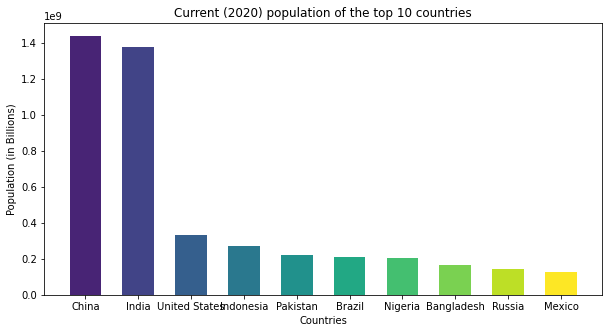

In [ ]:
fig = plt.figure(figsize = (10, 5))
viridis = plt.cm.get_cmap('viridis')
color_values = viridis(list(np.linspace(0.1,1,10)))

plt.bar(current_population['Country'][:10], current_population['Population'][:10], 
        color = color_values,
        width = 0.6)
plt.title('Current (2020) population of the top 10 countries')
plt.xlabel('Countries')
plt.ylabel('Population (in Billions)')
plt.show()

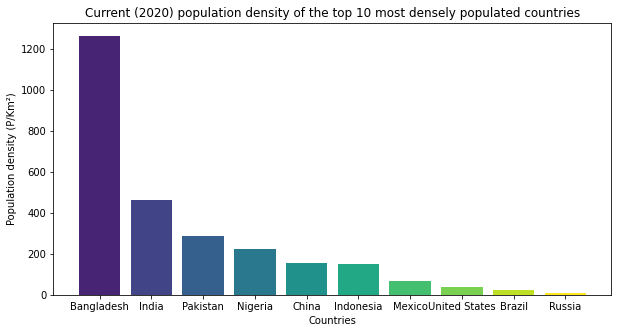

In [ ]:
fig = plt.figure(figsize = (10,5))
color_values = viridis(list(np.linspace(0.1,1,10)))

current_population.sort_values(by=['Density (P/Km²)'], ascending=False, inplace=True)
plt.bar(current_population['Country'][:10], current_population['Density (P/Km²)'][:10],
        color = color_values,
        width = 0.8)
plt.title('Current (2020) population density of the top 10 most densely populated countries')
plt.xlabel('Countries')
plt.ylabel('Population density (P/Km²)')
plt.show()

## Comparison (over time)
1. Overall country population across years
2. The slope of the curve above between every two consecutive years captured and displayed as the yearly change in the population (absolute) across years

In [ ]:
def country_wise_population(country):
    return df[df['Country'] == country]

In [ ]:
china_pop = country_wise_population('China')
india_pop = country_wise_population('India')
usa_pop = country_wise_population('United States')

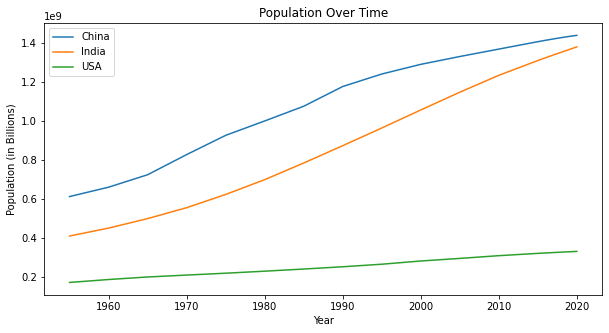

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(china_pop['Year'], china_pop['Population'], label='China')
plt.plot(india_pop['Year'], india_pop['Population'], label='India')
plt.plot(usa_pop['Year'], usa_pop['Population'], label='USA')
plt.title('Population Over Time')
plt.xlabel('Year')
plt.ylabel('Population (in Billions)')
plt.legend()
plt.show()

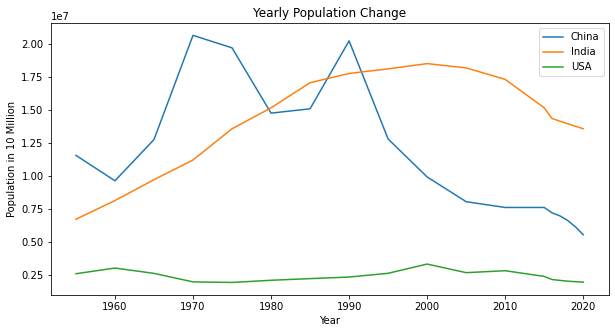

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(china_pop['Year'], china_pop['Yearly Change'], label='China')
plt.plot(india_pop['Year'], india_pop['Yearly Change'], label='India')
plt.plot(usa_pop['Year'], usa_pop['Yearly Change'], label='USA')
plt.title('Yearly Population Change')
plt.xlabel('Year')
plt.ylabel('Population in 10 Million')
plt.legend()
plt.show()

### Automating the process of plotting

In [ ]:
# You can also automate the plotting process by creating a function so as to not write the plotting commands repeatedly

def plot_data(*countries):
    parameter = input('Enter the parameter name: ')
    for country in countries:
        vars()[country] = country_wise_population(country) # creating a variable using the input to extract data for that country

    fig = plt.figure(figsize=(10,5))
    for country in countries:
        plt.plot(vars()[country]['Year'], vars()[country][parameter], label=country)
    plt.title(parameter + ' Over Time')
    plt.xlabel('Year')
    plt.ylabel('Population in 10 Million')
    plt.legend()
    plt.show()

Enter the parameter name: Yearly Change


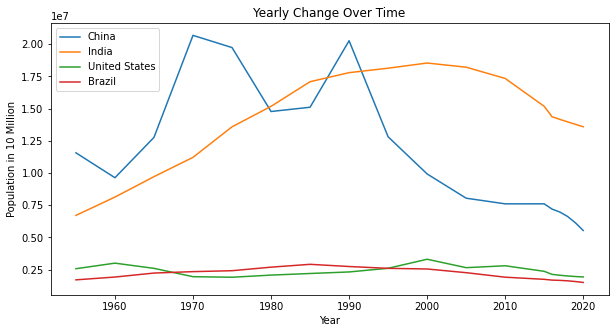

In [ ]:
plot_data('China', 'India', 'United States', 'Brazil')

### Comparison between countries over time

In [ ]:
population_top5_2020 = df[df['Year'] == 2020][:5]
top_5_countries = population_top5_2020['Country'].unique()
top5_popultion = df[df['Country'].isin(top_5_countries)][['Year', 'Country', 'Population', 'Yearly Change']]

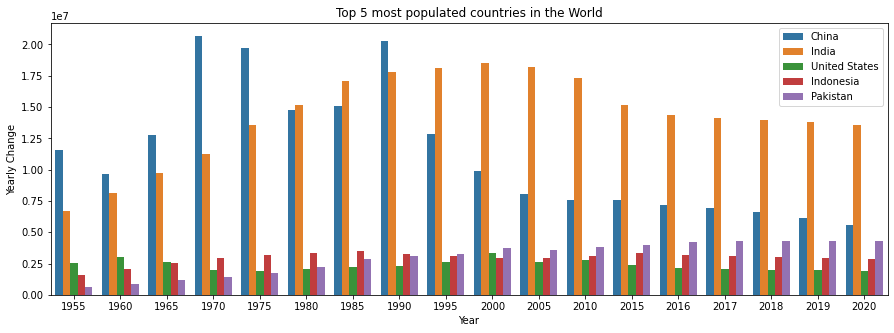

In [ ]:
import seaborn as sb

fig,ax = plt.subplots(figsize=(15, 5))

sb.barplot(x="Year", y="Yearly Change", data=top5_popultion, hue='Country')
ax.set_ylabel(ylabel = 'Yearly Change', fontsize = 10)
ax.set_xlabel(xlabel = 'Year', fontsize = 10)
ax.set_title('Top 5 most populated countries in the World')
ax.legend();

## Distribution
1. Select a country, plot the distribution of percentage-change-in-rural-population versus percentage-change-in-overall-population for different years as a scatterplot
2. For a few countries (each in different colour) observe fertility rate as a function of proportion of urban population, each point represents a year in the scatterplot

Text(0, 0.5, 'Fertility rate')

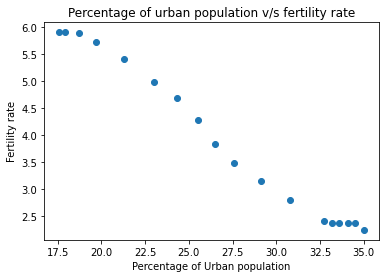

In [ ]:
#observe fertility rate as a function of proportion of urban population
india_pop = df[df['Country'] == 'India']
plt.figure()
plt.scatter(india_pop['Urban Pop %'], india_pop['Fertility Rate'])
plt.title("Percentage of urban population v/s fertility rate")
plt.xlabel('Percentage of Urban population')
plt.ylabel('Fertility rate')

Text(0.5, 1.0, 'Change in Fertility rate vs. change in %-age of urban population')

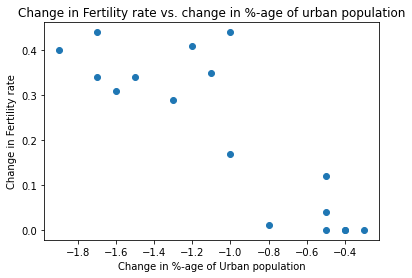

In [ ]:
india_pop_fertility = india_pop[['Fertility Rate', 'Urban Pop %']]
india_pop_fchange = india_pop_fertility.diff(periods=1, axis=0).dropna()

plt.scatter(india_pop_fchange['Urban Pop %'], india_pop_fchange['Fertility Rate'])
plt.xlabel('Change in %-age of Urban population')
plt.ylabel('Change in Fertility rate')
plt.title('Change in Fertility rate vs. change in %-age of urban population')

## Composition
1. Stacked bar graph to illustrate the proportions of urban and rural populations for a given country over time (the stacks add up to 100% so the growth or decline in overall population is not observable)
2. Stacked area charts: lower line chart for urban population in absolute numbers, and above it the line for rural population in absolute numbers

In [ ]:
india_pop_dist = india_pop[['Year', 'Population', 'Urban Pop %', 'Urban Population']]
india_pop_dist['Rural Pop %'] = 100 - india_pop_dist['Urban Pop %']
india_pop_dist['Rural Population'] = india_pop_dist['Population'] - india_pop_dist['Urban Population'] # calculating the rural population in absolute numbers
india_pop_dist.set_index('Year', inplace = True)
india_pop_dist.sort_values(by=['Year'], ascending=True, inplace=True)
india_pop_dist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

,Population,Urban Pop %,Urban Population,Rural Pop %,Rural Population
Year,,,,,
1955,409880595,17.6,71958495.0,82.4,337922100.0
1960,450547679,17.9,80565723.0,82.1,369981956.0
1965,499123324,18.7,93493844.0,81.3,405629480.0
1970,555189792,19.7,109388950.0,80.3,445800842.0
1975,623102897,21.3,132533810.0,78.7,490569087.0
1980,698952844,23.0,160941941.0,77.0,538010903.0
1985,784360008,24.3,190321782.0,75.7,594038226.0
1990,873277798,25.5,222296728.0,74.5,650981070.0
1995,963922588,26.5,255558824.0,73.5,708363764.0


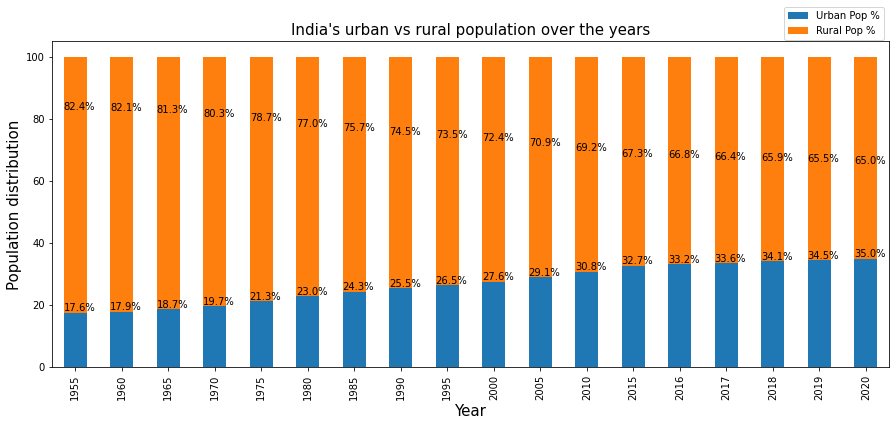

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
india_pop_dist[['Urban Pop %', 'Rural Pop %']].plot(kind='bar', stacked=True, ax=ax)

# set individual bar lables
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+.5, \
            str(round(i.get_height(), 3))+'%', fontsize=10)

ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Population distribution', fontsize=15)
ax.set_title('India\'s urban vs rural population over the years', fontsize=15)
ax.legend(bbox_to_anchor=(1, 1.12), loc=1)
plt.show()

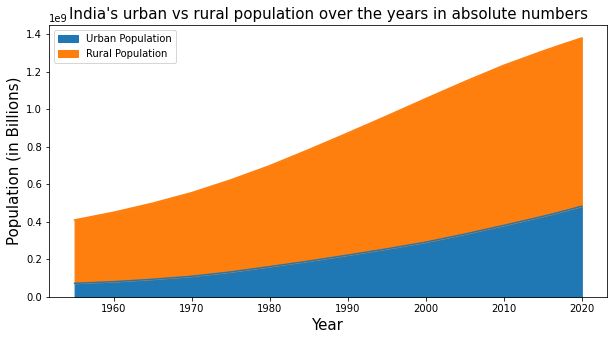

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
india_pop_dist[['Urban Population', 'Rural Population']].plot.area(ax=ax)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Population (in Billions)', fontsize=15)
ax.set_title('India\'s urban vs rural population over the years in absolute numbers', fontsize=15)
plt.show()

In [ ]:
#Select a country, plot the distribution of percentage-change-in-rural-population versus percentage-change-in-overall-population for different years as a scatterplot


In [ ]:
#creating percentage change for rural pop
df['Rural Population']=df['Population'] - df['Urban Population']
df['Change(%)_rural_pop'] = ((df['Rural Population'] - df["Rural Population"].shift(-1))/df["Rural Population"].shift(-1)*100).round(2)
df.sort_values(by=['Year'], ascending=True, inplace=True)



#Select a country, plot the distribution of percentage-change-in-rural-population versus percentage-change-in-overall-population for different years as a scatterplot
 
india_pop = df[df['Country'] == 'India']
plt.figure()
plt.scatter(india_pop['Change(%)_rural_pop'], india_pop['Yearly % Change'])
plt.title("% change-in-rural-population of india V/s % change-in-overall-population of india")
plt.xlabel('% change in rural population')
plt.ylabel('% change in overall population')